Churn prediction helps businesses:

  1. Identify which customers are at risk of leaving

  2. Understand the reasons behind churn

  3. Take action to retain customers (like discounts or loyalty programs)

In this project, your goal is to:

   1. Analyze which factors affect churn

   2. Build a model that can predict churn = Yes or No



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
#set visualiazation style
sns.set(style="whitegrid")

In [5]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Basic Dataset Information

In [7]:
data.shape

(7043, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Check for Missing Values

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Target Variable Distribution

In [14]:
print(data['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [15]:
print(data['Churn'].value_counts(normalize=True) * 100)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


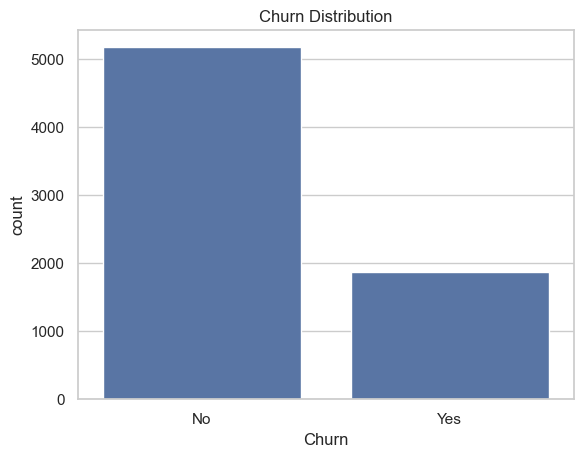

In [16]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Explore Key Features vs. Churn

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. tenure vs Churn

Shows how long customers stayed before leaving.

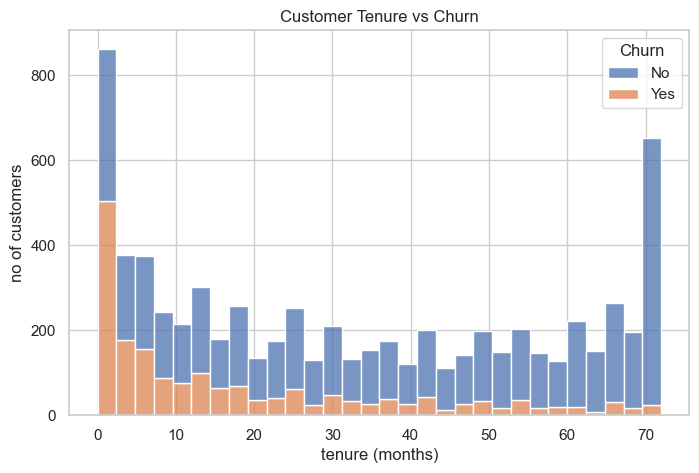

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure' , hue='Churn',multiple='stack',bins=30)
plt.title('Customer Tenure vs Churn')
plt.xlabel('tenure (months)')
plt.ylabel('no of customers')
plt.show()

Seaborn’s histplot() to visualize how customer tenure (how long they’ve been with the company) is distributed among customers who churned vs did not churn.

data=data  :-   Tells Seaborn which DataFrame to use

hue=churn   :-   Color-code (separate) the bars based on the Churn column (Yes or No)

multiple=stack  :-   Stack the bars on top of each other (instead of overlaying or side-by-side)

Insights  :-  New customers churn more than long-term ones.

2. Monthly charges vs churn
   
Helps understanding if high paying customers are more likely to leave 

In [24]:
print(data['MonthlyCharges'].max())
print(data['MonthlyCharges'].min())

118.75
18.25


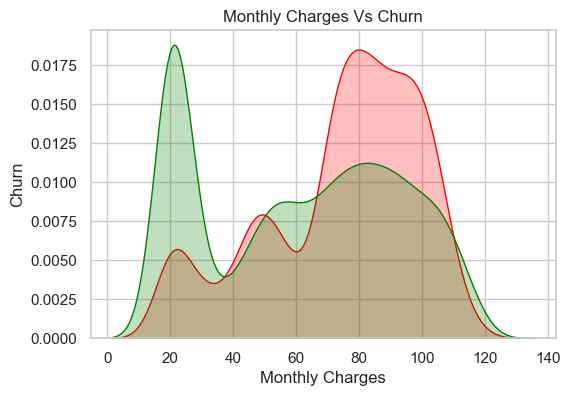

In [25]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data[data['Churn']=='Yes']['MonthlyCharges'], label='Churned',fill=True,color='red')
sns.kdeplot(data=data[data['Churn']=='No']['MonthlyCharges'], label='Not Churned',fill=True,color='green')
plt.title('Monthly Charges Vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

What is sns.kdeplot()?

It stands for Kernel Density Estimate plot—used to visualize the probability distribution of a continuous variable (like MonthlyCharges) 

in a smooth, bell-curve style.


data[data['Churn']=='Yes']  :-  Filters rows from data where only Churn is yes

1. Customers with Low Monthly Charges (~$20–$40)  -->>   These customers are less likely to churn

2. Customers with Mid to High Monthly Charges (~$70–$100)  -->>  These customers churn more often

3. Overlap around $60–$80  

3. Contract Type Vs Churn

   Do customers on month-to-month plans churn more?

In [30]:
print(data['Contract'].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


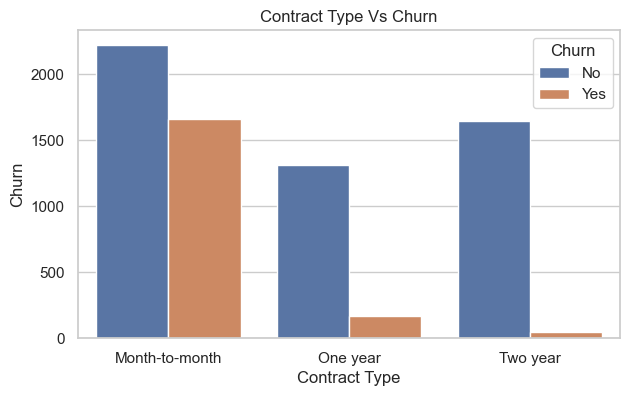

In [31]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Contract',hue='Churn',data=data)
plt.title("Contract Type Vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Churn")
plt.show()

4. Payment Methods vs Churn

   Are certain payment methods risker?

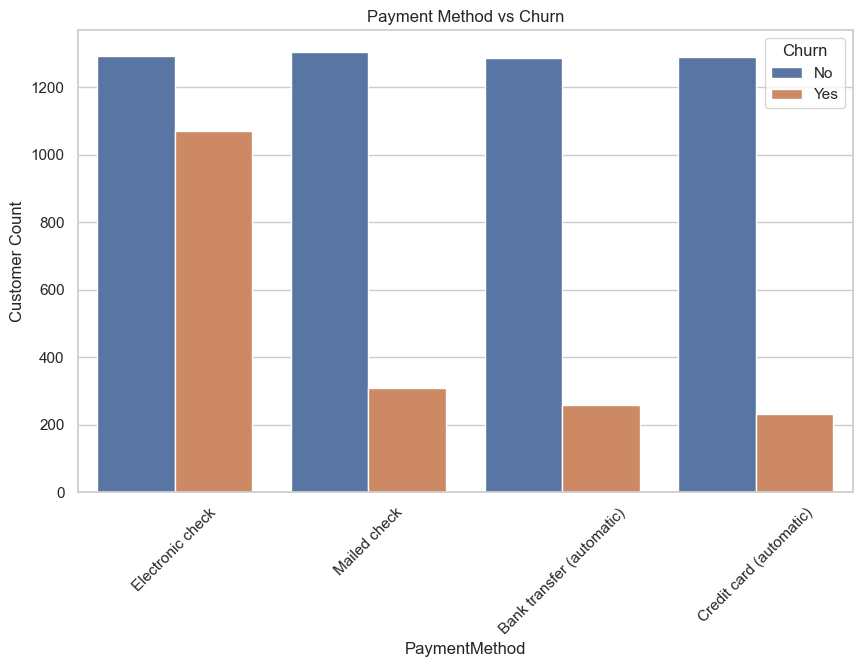

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.ylabel('Customer Count')
plt.show()

# Check for Duplicates
Before preprocessing, always check if there are any duplicate rows.

In [35]:
duplicates = data.duplicated().sum()
print(duplicates)

0


# Phase 2: Data Preprocessing

In [37]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [38]:
data = data.drop(columns='customerID')

In [39]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [40]:
# Step 1: Fix TotalCharges (convert from object to float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges']).reset_index(drop=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
data.shape

(7032, 20)

In [42]:
# Step 2: Convert target variable 'Churn' to binary
data['Churn'] = data['Churn'].map({'Yes':1 , 'No':0})

In [43]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [44]:
categorical_col = data.select_dtypes(include='object').columns.tolist()
categorical_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [45]:
data_encode = pd.get_dummies(data, columns=categorical_col, drop_first=True)
data_encode

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7028,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7029,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7030,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [46]:
data_encode.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [47]:
bool_col = data_encode.select_dtypes(include='bool').columns.tolist()

In [48]:
for col in bool_col:
    data_encode[col] = data_encode[col].astype(int)

In [49]:
print(data_encode.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int32
Partner_Yes                                int32
Dependents_Yes                             int32
PhoneService_Yes                           int32
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No internet service            int32
TechSupport_Yes     

In [50]:
data_encode

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [51]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [53]:
data_encode

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
data_encode.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,-0.008392,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,-0.007877,...,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,-0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,-0.113008,...,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,-0.011691,...,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,0.007515,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,-0.018397,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,0.001078,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,-1.000000,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,-0.011691,0.007515,-0.018397,0.001078,-1.000000,1.000000,...,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463


# Model Building

Step 1: Split Data into Features and Target

In [57]:
X = data_encode.drop('Churn', axis=1)
Y = data_encode['Churn']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, Y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
Y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, Y_pred))

Accuracy Score:  0.7867803837953091
Confusion Matrix:  [[919 114]
 [186 188]]


In [62]:
print("Classification Report: ", classification_report(Y_test, Y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [63]:
report = classification_report(Y_test, Y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score     support
0              0.831674  0.889642  0.859682  1033.00000
1              0.622517  0.502674  0.556213   374.00000
accuracy       0.786780  0.786780  0.786780     0.78678
macro avg      0.727095  0.696158  0.707947  1407.00000
weighted avg   0.776077  0.786780  0.779016  1407.00000


In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_pred,Y_test)
cm

array([[919, 186],
       [114, 188]], dtype=int64)

# Model2

In [66]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
Y_pred2 = model2.predict(X_test)

In [68]:
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred2))

Accuracy Score:  0.7839374555792467


In [69]:
report2 = classification_report(Y_test, Y_pred2, output_dict=True)
df_report2 = pd.DataFrame(report2).transpose()
print(df_report2)

              precision    recall  f1-score      support
0              0.824000  0.897386  0.859129  1033.000000
1              0.624113  0.470588  0.536585   374.000000
accuracy       0.783937  0.783937  0.783937     0.783937
macro avg      0.724057  0.683987  0.697857  1407.000000
weighted avg   0.770867  0.783937  0.773392  1407.000000


# HyperParameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [73]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

In [74]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [75]:
print("✅ Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
Y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("📊 Classification Report:\n", classification_report(Y_test, Y_pred_rf))

✅ Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
✅ Accuracy: 0.7953091684434968
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



These are the optimal hyperparameters found by GridSearchCV:

  1. n_estimators=200: The forest uses 200 trees.

  2. max_depth=10: Each tree is limited to a max depth of 10 (prevents overfitting).

  3. min_samples_split=5: A node must have at least 5 samples to be split.

  4. min_samples_leaf=2: A leaf must have at least 2 samples.

  5. bootstrap=True: Bootstrapping is used (sampling with replacement).

# Save Model

In [78]:
import pickle
import joblib

# Save model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)


# Save the list of feature column names used in training
joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

# Data for building the Power BI churn dashboard

In [81]:
data_export = X.copy()
data_export['Churn'] = Y

In [82]:
data_export['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [83]:
# Convert Churn to Yes/No 
data_export['Churn'] = data_export['Churn'].map({1:"Yes" , 0:"No"})

In [84]:
data_export['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [85]:
# Export the Final DataFrame:
data_export.to_csv("data_for_powerbi.csv", index=False)

# Reverse Dummy Variables for Better Power BI Visuals

That part of code is used to reverse the one-hot encoding (dummy variables) back into the original readable category columns 

so that your data looks clean and is easier to visualize in Power BI.


In [89]:
dataframe = pd.read_csv('data_for_powerbi.csv')
dataframe.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,No
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,No
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,Yes
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,No
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,Yes


In [90]:
dataframe.columns.tolist()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn']

In [91]:
#function for reversing dummy encoding for a set of columns into redable format
def reverse_dummies(dataframe, prefix_list):
    for prefix in prefix_list:
        # Extract columns starting with this prefix
        cols = [col for col in dataframe.columns if col.startswith(prefix + "_")]
        # Create new column with category name from one-hot columns
        dataframe[prefix] = dataframe[cols].idxmax(axis=1).str.replace(f"{prefix}_", "")
        # Drop old dummy columns
        dataframe.drop(columns=cols, inplace=True)
    return dataframe
        
dataframe_clean = dataframe.copy()

In [92]:
prefixes_to_convert = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

dataframe_clean = reverse_dummies(dataframe_clean, prefixes_to_convert)

In [93]:
dataframe_clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,No,Male,Yes,Yes,Yes,No phone service,Fiber optic,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check
1,0,34,56.95,1889.50,No,Male,Yes,Yes,Yes,No phone service,Fiber optic,Yes,No internet service,Yes,No internet service,No internet service,No internet service,One year,Yes,Mailed check
2,0,2,53.85,108.15,Yes,Male,Yes,Yes,Yes,No phone service,Fiber optic,Yes,Yes,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
3,0,45,42.30,1840.75,No,Male,Yes,Yes,Yes,No phone service,Fiber optic,Yes,No internet service,Yes,Yes,No internet service,No internet service,One year,Yes,Credit card (automatic)
4,0,2,70.70,151.65,Yes,Male,Yes,Yes,Yes,No phone service,Fiber optic,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check


In [94]:
dataframe_clean.to_csv("Clean_data_for_powerbi.csv", index=False)